# Practicing EDA & Classification models on Wine Quality dataset

In [1]:
# Importing essential libraries

import numpy as np
import pandas as pd
import warnings # for ignoring any warnings
warnings.filterwarnings('ignore') # to ignore warnings
import seaborn as sb
sb.set(style='white', color_codes=True) # some styling parameters
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading and reading data

wqr=pd.read_csv("winequality_red.csv")
print("Successfully Imported data!")
wqr

Successfully Imported data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
wqr.dtypes # checking datatypes of given columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
wqr.info() # checking any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(wqr.isna().sum()) # finding any null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
wqr.describe() # Statistical summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Observations from above Statistical summary:

- We can see the Mean is more than Median in all columns (50th %tile)
- There can be seen huge difference in 75th %tile and max in residual sugar, free sulfur dioxide, total sulfur dioxide
- From observations 1 & 2, we can say there are outliers present in above particular columns

In [7]:
wqr.corr() # Exploring Correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [8]:
wqr.groupby('quality').mean() # Checking Mean of Quality column

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [9]:
wqr.quality.unique() # Checking Mean of Quality column with unique values

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [10]:
# Checking Quality scores assigned to each columns

wqr.quality.value_counts() # using Pandas method

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Performing [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) and [Data Visualization](https://en.wikipedia.org/wiki/Data_and_information_visualization)

#### _[Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)_
#### _[Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) ([KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html))_
#### _[Distribution plot](https://seaborn.pydata.org/generated/seaborn.distplot.html)_
#### _[Box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)_
#### _[Histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html)_
#### _[Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)_
#### _[Pair plot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)_
#### _[Violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)_

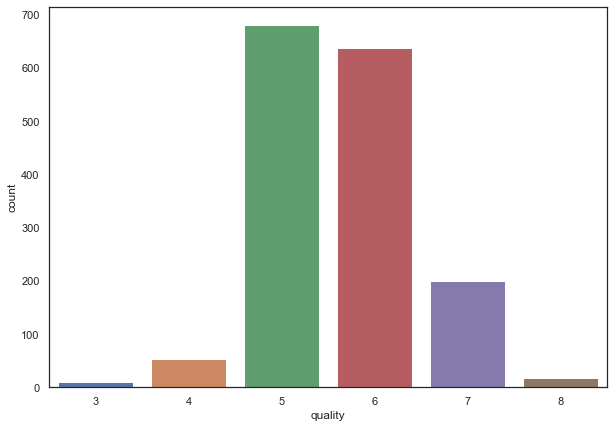

In [11]:
# Countplot for Quality:

plt.figure(figsize=(10,7))
sb.countplot(wqr['quality'])
plt.show()

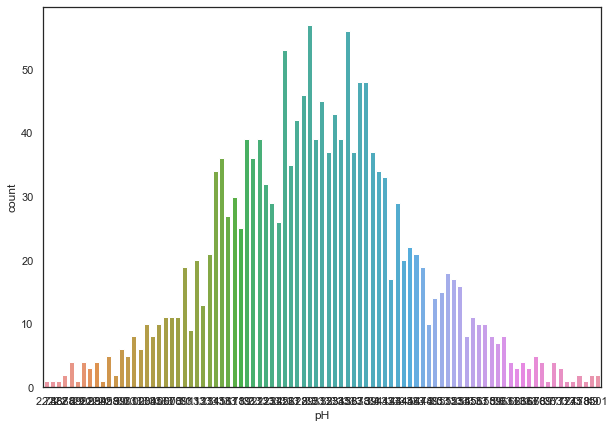

In [12]:
# Countplot for pH:

plt.figure(figsize=(10,7))
sb.countplot(wqr['pH'])
plt.show()

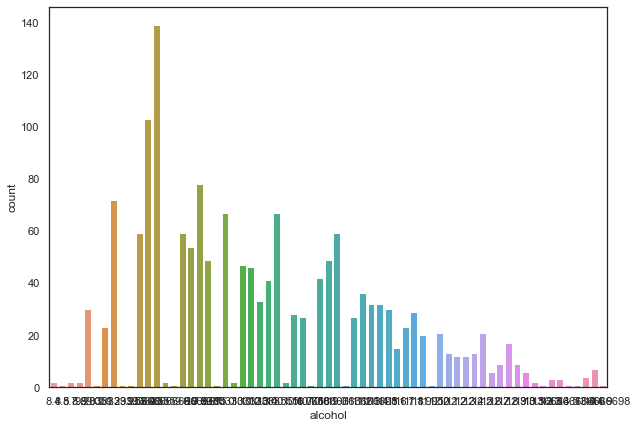

In [13]:
# Countplot for Alcohol:

plt.figure(figsize=(10,7))
sb.countplot(wqr['alcohol'])
plt.show()

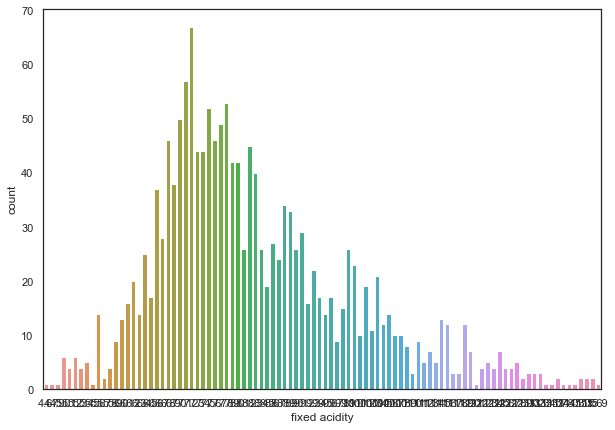

In [14]:
# Countplot for Fixed Acidity:

plt.figure(figsize=(10,7))
sb.countplot(wqr['fixed acidity'])
plt.show()

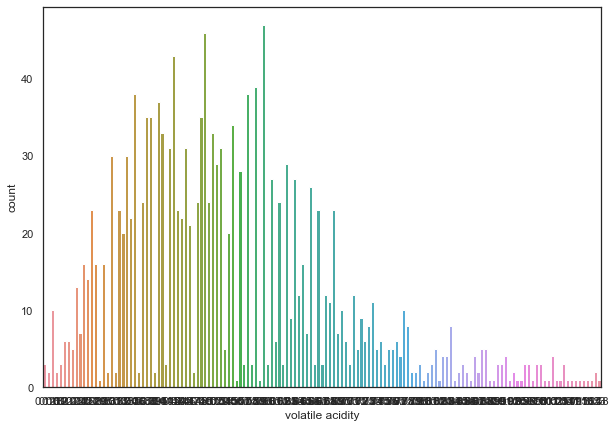

In [15]:
# Countplot for Volatile Acidity:

plt.figure(figsize=(10,7))
sb.countplot(wqr['volatile acidity'])
plt.show()

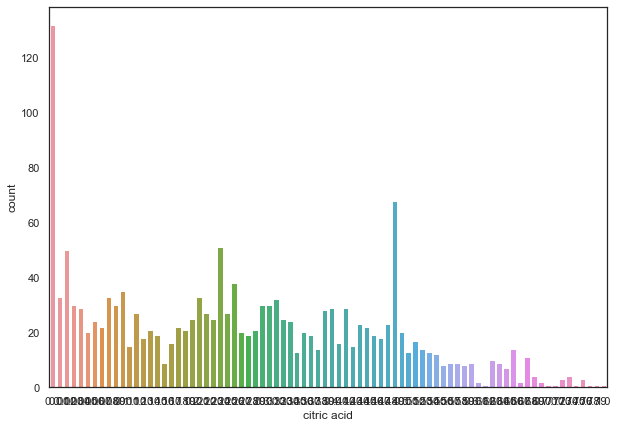

In [16]:
# Countplot for Citric Acid:

plt.figure(figsize=(10,7))
sb.countplot(wqr['citric acid'])
plt.show()

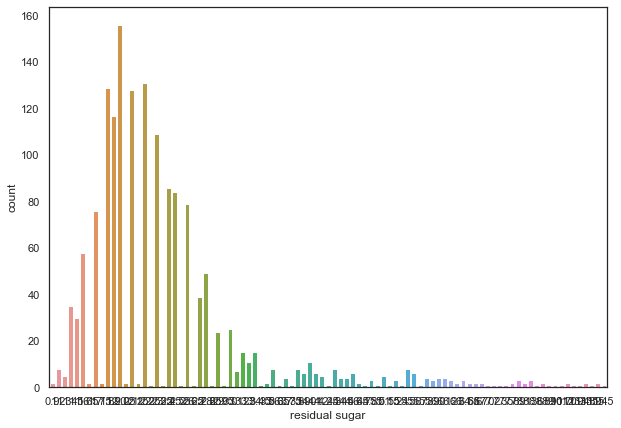

In [17]:
# Countplot for Residual Sugar:

plt.figure(figsize=(10,7))
sb.countplot(wqr['residual sugar'])
plt.show()

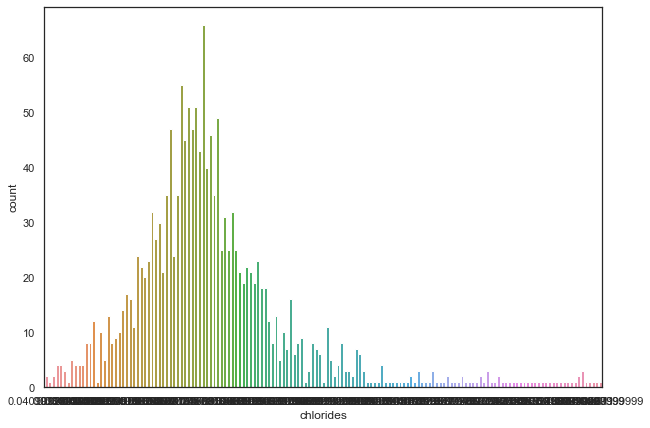

In [18]:
# Countplot for Chlorides:

plt.figure(figsize=(10,7))
sb.countplot(wqr['chlorides'])
plt.show()

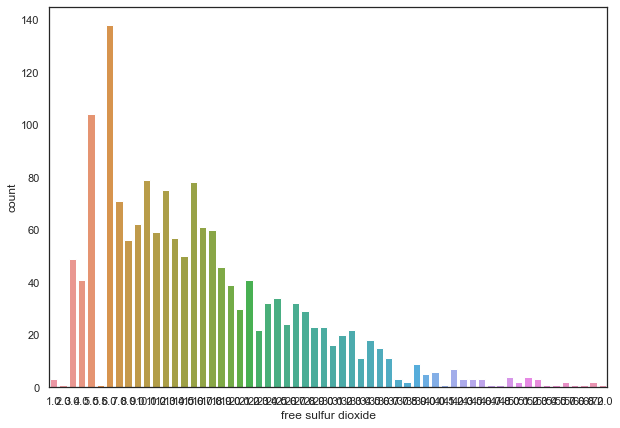

In [19]:
# Countplot for Free Sulfur Dioxide:

plt.figure(figsize=(10,7))
sb.countplot(wqr['free sulfur dioxide'])
plt.show()

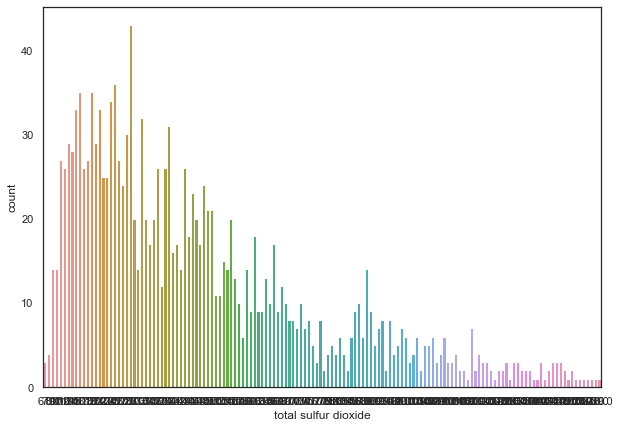

In [20]:
# Countplot for Total Sulfur Dioxide:

plt.figure(figsize=(10,7))
sb.countplot(wqr['total sulfur dioxide'])
plt.show()

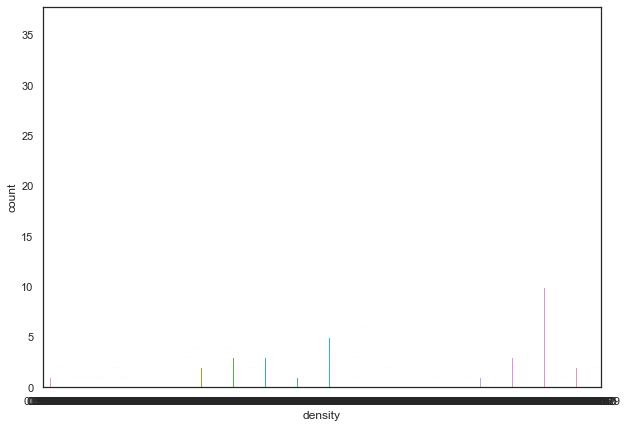

In [21]:
# Countplot for Density:

plt.figure(figsize=(10,7))
sb.countplot(wqr['density'])
plt.show()

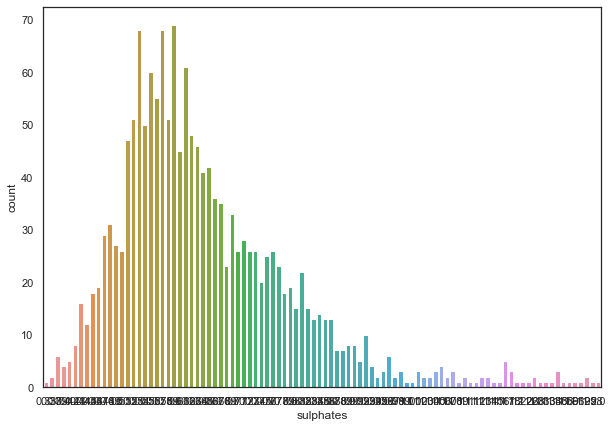

In [22]:
# Countplot for Sulphates:

plt.figure(figsize=(10,7))
sb.countplot(wqr['sulphates'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='Density'>

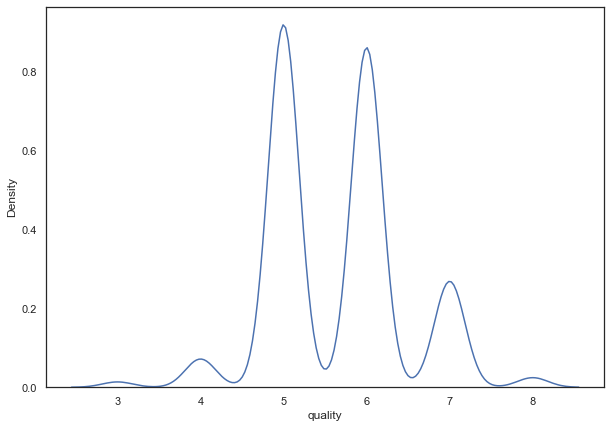

In [23]:
# KDE plot for Quality:

plt.figure(figsize=(10,7))
sb.kdeplot(wqr.query('quality>2').quality)

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

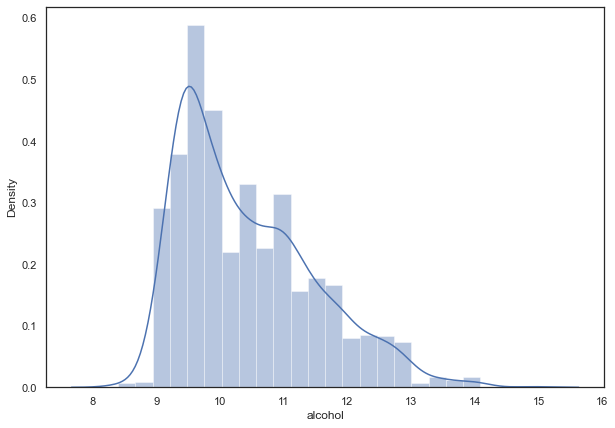

In [24]:
# Distplot for Alcohol:

plt.figure(figsize=(10,7))
sb.distplot(wqr['alcohol'])

fixed acidity               AxesSubplot(0.125,0.71587;0.133621x0.16413)
volatile acidity         AxesSubplot(0.285345,0.71587;0.133621x0.16413)
citric acid               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
residual sugar           AxesSubplot(0.606034,0.71587;0.133621x0.16413)
chlorides                AxesSubplot(0.766379,0.71587;0.133621x0.16413)
free sulfur dioxide        AxesSubplot(0.125,0.518913;0.133621x0.16413)
total sulfur dioxide    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
density                  AxesSubplot(0.44569,0.518913;0.133621x0.16413)
pH                      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
sulphates               AxesSubplot(0.766379,0.518913;0.133621x0.16413)
alcohol                    AxesSubplot(0.125,0.321957;0.133621x0.16413)
quality                 AxesSubplot(0.285345,0.321957;0.133621x0.16413)
dtype: object

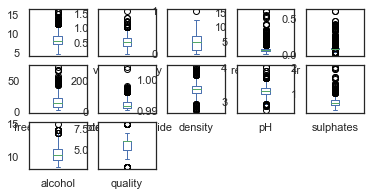

In [25]:
# Box plot displaying all columns:

wqr.plot(kind='box', subplots=True, layout=(4,5), sharex=False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

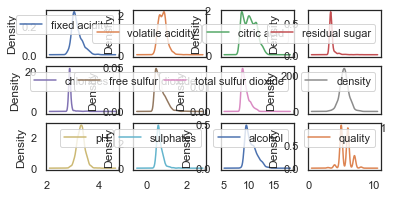

In [26]:
# Density plot displaying all columns:

wqr.plot(kind='density', subplots=True, layout=(4,4), sharex=False)

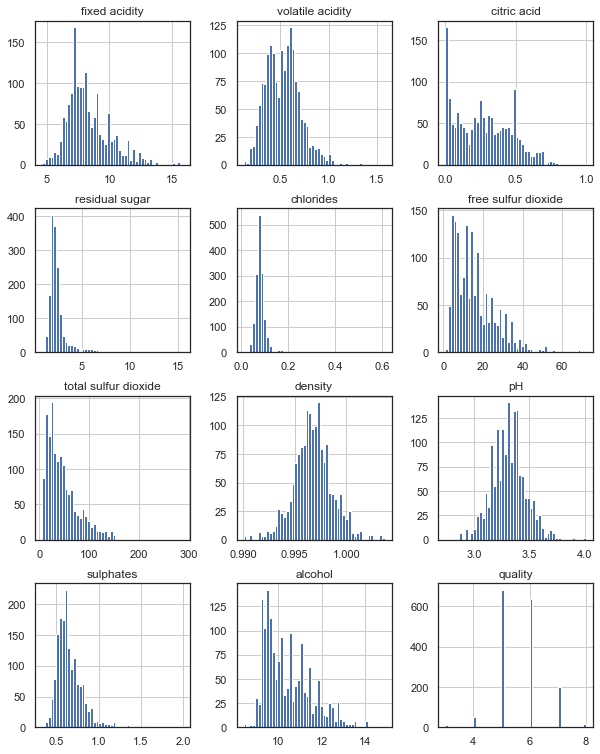

In [27]:
# Histogram displaying all columns:

wqr.hist(figsize=(10,13),bins=50)
plt.show()

<AxesSubplot:>

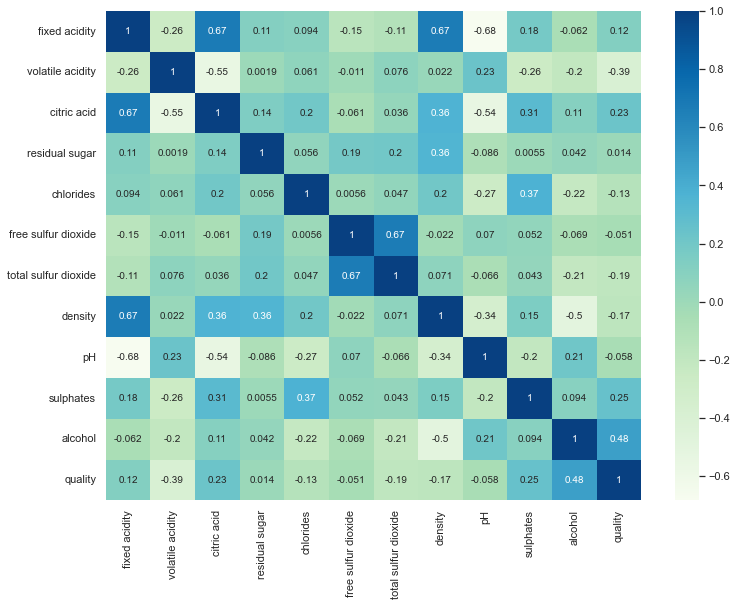

In [28]:
# Heatmap for expressing Correlation:

wqrcor=wqr.corr()
wqrcor
plt.figure(figsize=(12,9))
sb.heatmap(wqrcor,cmap='GnBu',annot=True) # cmap is color map in Matplotlib; annot is to write the data value in each cell

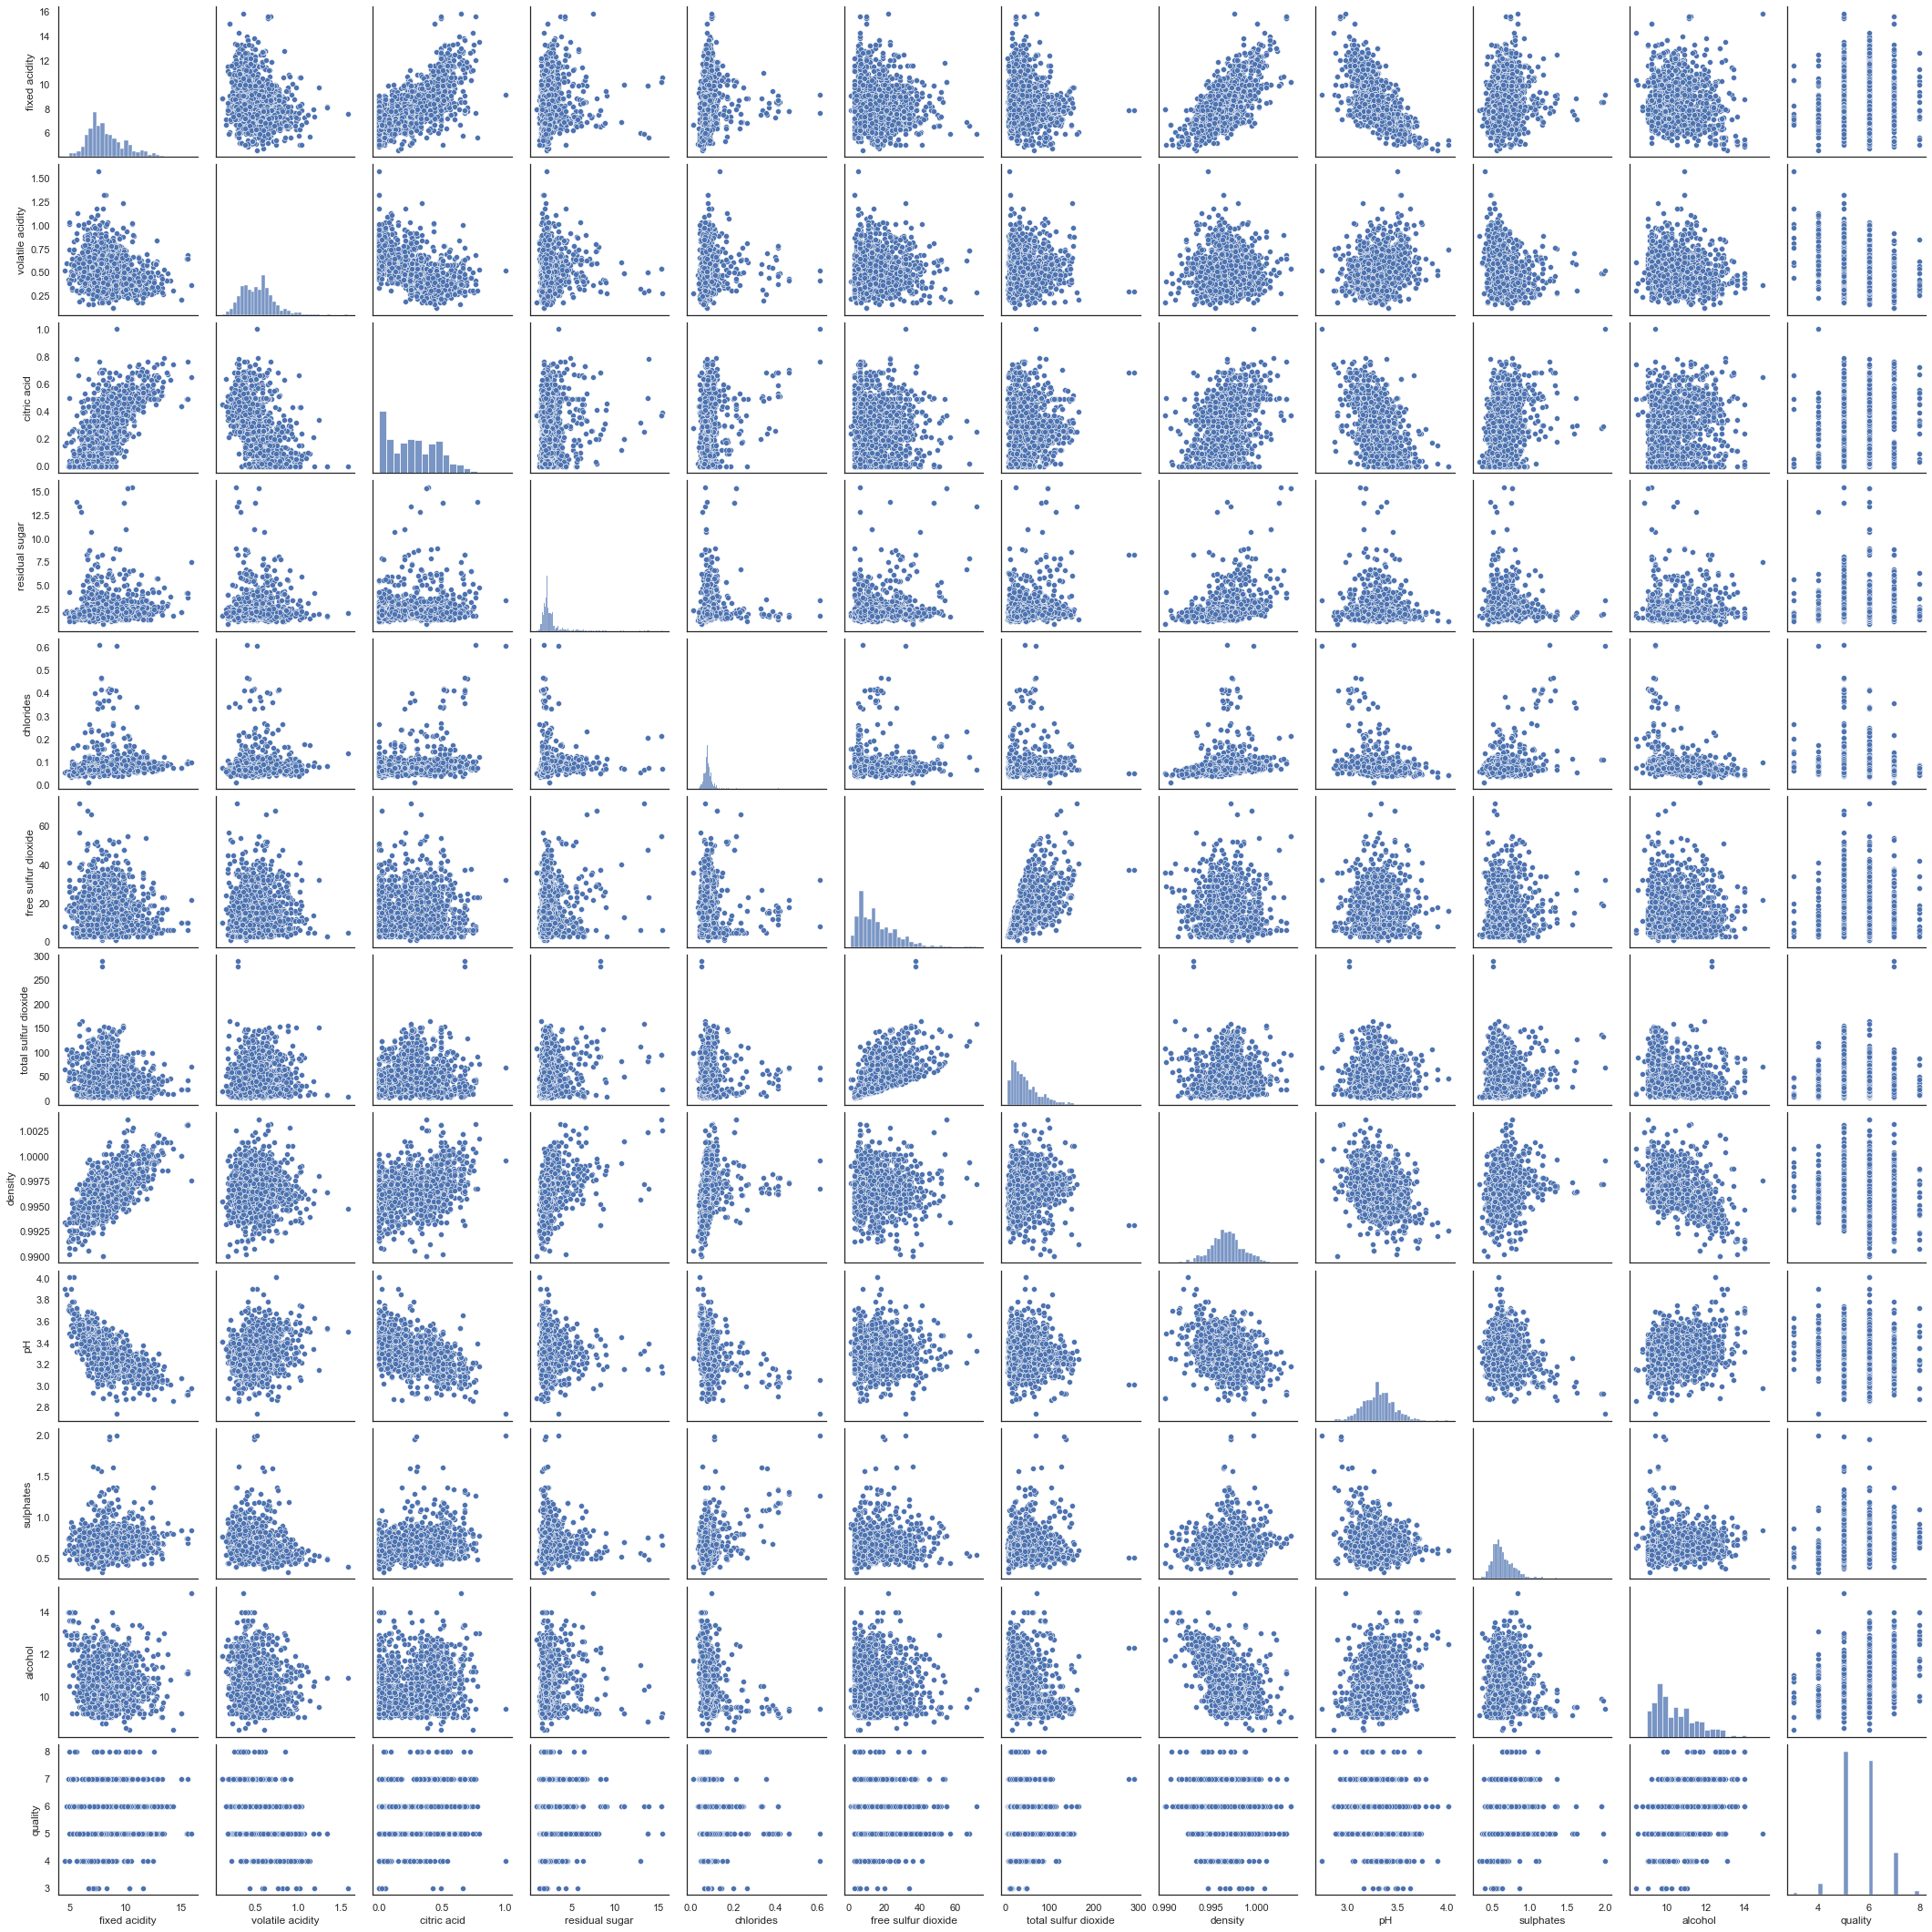

In [29]:
# Pairplot displaying all columns:

sb.pairplot(wqr)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

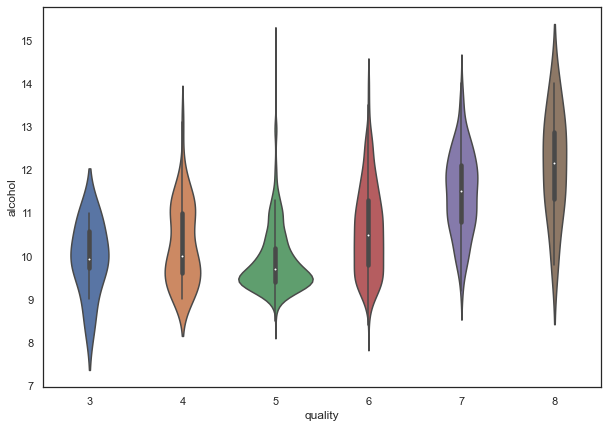

In [30]:
# Violin plot displaying Quality and Alcohol columns:

plt.figure(figsize=(10,7))
sb.violinplot(x='quality', y='alcohol', data=wqr)

## Performing [Feature Selection](https://en.wikipedia.org/wiki/Feature_selection) on the dataset

In [31]:
# Create Classification version of target variable

wqr['goodquality']=[1 if x>=7 else 0 for x in wqr['quality']] # separate feature and target variables
X=wqr.drop(['quality','goodquality'], axis=1)
Y=wqr['goodquality']

# Checking proportion of good vs bad wine

wqr['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [32]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [33]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


## Performing [Feature Importance](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285) using Machine Learning libraries

In [34]:
# Importing essentital Machine Learning libraries

!pip install scikit-learn
!pip install xgboost
from sklearn.linear_model import LinearRegression # importing LinearRegression
from sklearn.ensemble import RandomForestRegressor # importing RandomForestRegressor -- ensemble technique
from sklearn.tree import DecisionTreeRegressor # importing DecisionTreeRegressor
from sklearn.svm import SVR # importing SVR
import xgboost as xgb

# Now importing r2_score, MSE, accuracy_score, confusion_matrix below

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern=ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07462207 0.10101202 0.10280016 0.07378684 0.06704936 0.06857942
 0.08140863 0.08594405 0.06812334 0.11088691 0.16578721]


In [36]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)

In [37]:
# Finding accuracy score using Logistic Regression

model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.86875


## KNN algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)

# Using split data
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

# Finding accuracy score using KNN
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8729166666666667


## Support Vector Classifer

In [39]:
from sklearn.svm import SVC
model=SVC()

# Using split data
model.fit(X_train,Y_train)
pred_y=model.predict(X_test)

# Finding accuracy score using SVC
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.86875


## Decision Tree algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=7)

# Using split data
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

# Finding accuracy score using DTC
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8645833333333334


## Gaussian Naive Bayes (GaussianNB)

In [41]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

# Using split data
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

# Finding accuracy score using GaussianNB
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8333333333333334


## Random Forest algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=1)

# Using split data
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

# Finding accuracy score using Random Forest
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.89375


## XGBoost

In [43]:
model=xgb.XGBClassifier(random_state=1)

# Using split data
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

# Finding accuracy score using XGBoost
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.8916666666666667


### Displaying the Accuracy of all training models with DataFrame

In [44]:
results=pd.DataFrame({
    'Model':['Logistic Regression','KNN','SVC','Decision Tree','GaussianNB','Random Forest','XGBoost'],
    'Score':[0.86875,0.87291,0.86875,0.86458,0.83333,0.89375,0.89166]})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
0.89375,Random Forest
0.89166,XGBoost
0.87291,KNN
0.86875,Logistic Regression
0.86875,SVC
0.86458,Decision Tree
0.83333,GaussianNB


# From above Machine Learning models, we can conclude:
### **_Random Forest algorithm_** is best suited for the above dataset